# Table of Contents

1. [Introduction](#Introduction)
2. [Required Modules](#Required-Modules)
3. [Data Preprocessing](#Data-Preprocessing)
  - [Key Features](#Key-Features)
  - [Descriptive Statistics](#Descriptive-Statistics)
  - [Missing Values](#Missing-Values)
  - [Data Transformation](#Data-Transformation)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Visualization](#Visualization)
  - [Correlation](#Correlation)
5. [Model Building](#Model-Building)
  - [Decision Tree](#Decision-Tree)
  - [Random Forest](#Random-Forest)
6. [Evaluation](#Evaluation)
  - [Confusion Matrix](#Confusion-Matrix)
  - [Other Metrics](#Other-Metrics)
7. [Conclusion](#Conclusion)

## 1. Introduction <a name="Introduction"></a>

Sleep disorders are a prevalent health concern affecting a significant portion of the population. They can have a profound impact on an individual's overall well-being, productivity, and quality of life. Therefore, the accurate and timely detection of sleep disorders is crucial for effective diagnosis and treatment.

In recent years, advancements in technology and data analysis techniques have provided new opportunities for sleep disorder detection. Researchers and healthcare professionals have increasingly turned to machine learning and data-driven approaches to analyze sleep-related data and identify patterns indicative of different sleep disorders.


The objective of this project is to develop a predictive model for sleep disorder based on a comprehensive [dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset) obtained from [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset). By leveraging machine learning techniques and exploratory data analysis, we aim to identify key risk factors and build a reliable model that can accurately extract meaningful insights and develop a model capable of accurately detecting sleep disorder and its type.


The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It contains a wealth of information related to sleep patterns such as
gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.


We will employ several machine learning algorithms, such as **Decision Tree**, and **Random Forest**, to build predictive models. These models will be trained on a portion of the dataset and evaluated using appropriate performance metrics. By comparing and analyzing the results, we will identify the most effective model for predicting sleep disorder.


In the following sections, we will delve into the dataset, perform preprocessing tasks, conduct exploratory data analysis, build and evaluate predictive models, and conclude with a summary of our findings and potential future directions.









## 2. Required Modules <a name="Required-Modules"></a>



In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

## 3. Data Preprocessing <a name="Data-Preprocessing"></a>
In this section, we discuss the steps taken to preprocess the dataset. Through preprocessing steps, including data cleaning, handling missing values, and converting categorical variables into numerical formats, we will ensure the dataset is ready for analysis.


### 3.1 Key Features <a name="Key-Features"></a>

- Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
- Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
- Cardiovascular Health: Examine blood pressure and heart rate measurements.
- Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.



#### Details about Sleep Disorder Column:
- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

<br>

| Column Name | Description |
| --- | --- |
|Person_ID | Unique ID assigned to each person |
|Gender|The gender of the person (Male/Female)|
|Age | Age of the person in years |
|Occupation | The occupation of the person |
|Sleep_duration | The duration of sleep of the person in hours |
|Quality_of_sleep | A subjective rating of the quality of sleep, ranging from 1 to 10|
|Physical_activity | The level of physical activity of the person (Low/Medium/High) |
|Stress Level| A subjective rating of the stress level, ranging from 1 to 10 |
|BMI_category | The BMI category of the person (Underweight/Normal/Overweight/Obesity) |
|Blood_pressure | The blood pressure of the person in mmHg |
|Heart_rate | The heart rate of the person in beats per minute |
|Daily Steps | The number of steps taken by the person per day |
|Sleep_disorder | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea) |




In [59]:
# Load the data
data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
data.head(-1)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [60]:
#dropping unnecessary info
data.drop('Person ID', axis=1, inplace=True)
data.head(-1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
368,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


### 3.2 Descriptive Statistics <a name="Descriptive-Statistics"></a>

Now we generate the summary statistics:

- Count: The number of non-missing values in each column.
- Mean: The average value of each column.
- Standard Deviation: A measure of the amount of variation or dispersion in each column.
- Minimum: The minimum value in each column.
- 25th Percentile (Q1): The value below which 25% of the data falls.
- Median (50th Percentile or Q2): The middle value in each column. It represents the value below which 50% of the data falls.
- 75th Percentile (Q3): The value below which 75% of the data falls.
- Maximum: The maximum value in each column.


In [61]:
data.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


### 3.3 Missing Values <a name="Missing-Values"></a>

The nan/None value in sleep disorder stands for no sleep disorder, so it is not a missing value.

In [63]:
# Check for missing values in the dataset
data.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [64]:
#checking the number of unique values in each column
print("Unique values in each column are:")
for col in data.columns:
    print(col,data[col].nunique())

Unique values in each column are:
Gender 2
Age 31
Occupation 11
Sleep Duration 27
Quality of Sleep 6
Physical Activity Level 16
Stress Level 6
BMI Category 4
Blood Pressure 25
Heart Rate 19
Daily Steps 20
Sleep Disorder 3


### 3.4 Data Transformation <a name="Data-Transformation"></a>

Splitting the blood pressure into systolic and diastolic

In [65]:
#spliting the blood pressure into two columns
data['systolic_bp'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['diastolic_bp'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

#droping the blood pressure column
data.drop('Blood Pressure', axis=1, inplace=True)

#replacing normal weight with normal in BMI column
data['BMI Category'] = data['BMI Category'].replace('Normal Weight', 'Normal')

data.head(-1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,systolic_bp,diastolic_bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


In [66]:
#checking unique values from categorical columns
print(data.Occupation.unique())
print()
print(data['BMI Category'].unique())
print()
print(data['Sleep Disorder'].unique())

['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

['Overweight' 'Normal' 'Obese']

['None' 'Sleep Apnea' 'Insomnia']


## 4. Exploratory Data Analysis <a name="Exploratory-Data-Analysis"></a>

Exploratory data analysis will allow us to gain insights into the distribution of features, detect correlations, and uncover potential patterns and trends related to sleep disorder.

### 4.1 Visualization <a name="Visualization"></a>

<ipython-input-51-0a65b7190fae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Gender', data = data, ax = ax[0,0],palette='dark')
<ipython-input-51-0a65b7190fae>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = 'Age', data = data, ax = ax[0,1], bins = 10,palette='dark')
<ipython-input-51-0a65b7190fae>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x = 'Sleep Duration', data = data, ax = ax[0,2], bins = 10,palette='dark')
<ipython-input-51-0a65b7190fae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Quality of Sleep', data = data, ax = ax[1,0],palette='dark')
<ipython-input-51

<Axes: xlabel='Sleep Disorder', ylabel='count'>

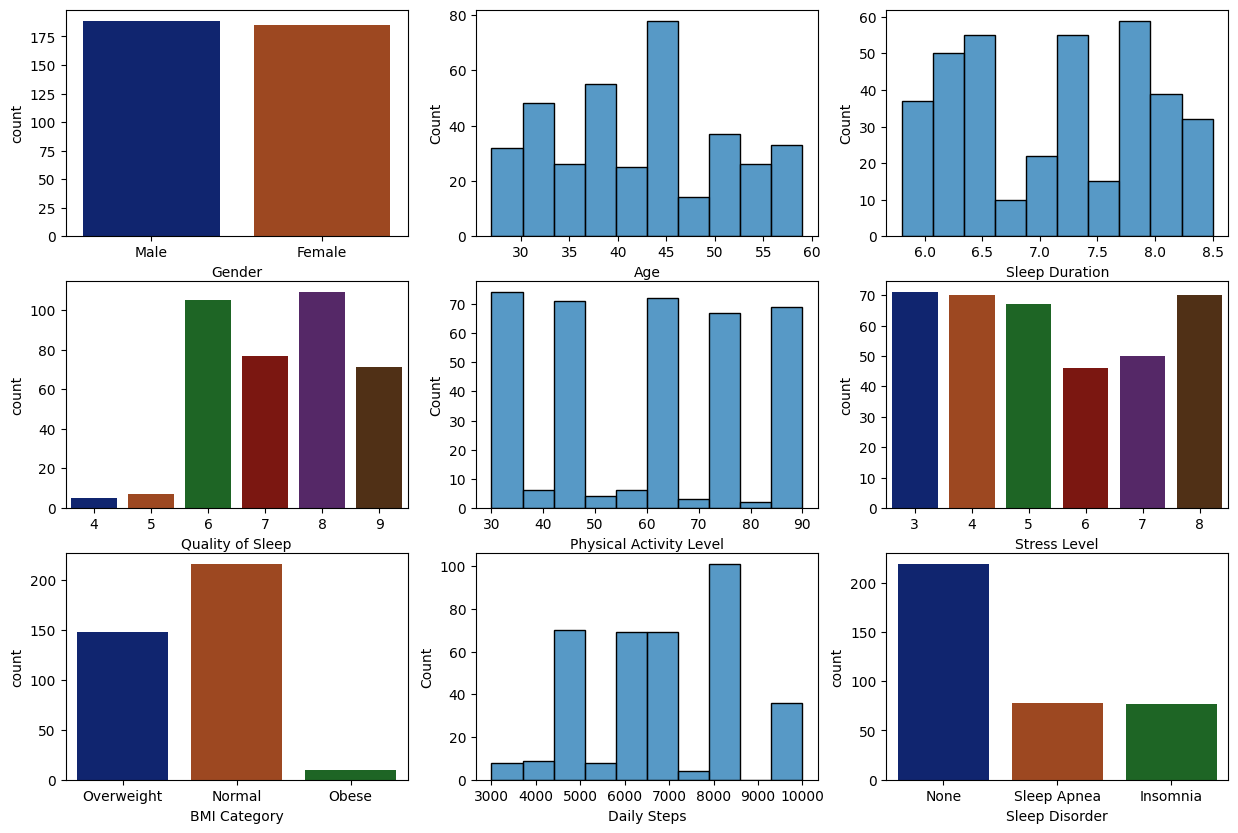

In [51]:
fig,ax = plt.subplots(3,3,figsize=(15,10))
sns.countplot(x = 'Gender', data = data, ax = ax[0,0],palette='dark')
sns.histplot(x = 'Age', data = data, ax = ax[0,1], bins = 10,palette='dark')
sns.histplot(x = 'Sleep Duration', data = data, ax = ax[0,2], bins = 10,palette='dark')
sns.countplot(x = 'Quality of Sleep', data = data, ax = ax[1,0],palette='dark')
sns.histplot(x = 'Physical Activity Level', data = data, ax = ax[1,1], bins = 10,palette='dark')
sns.countplot(x = 'Stress Level', data = data, ax = ax[1,2],palette='dark')
sns.countplot(x = 'BMI Category', data = data, ax = ax[2,0],palette='dark')
sns.histplot(x = 'Daily Steps', data = data, ax = ax[2,1], bins = 10,palette='dark')
sns.countplot(x = 'Sleep Disorder', data = data, ax = ax[2,2],palette='dark')

The gender distribution in the dataset is fairly balanced, with a similar number of males and females. The majority of individuals fall within the age range of 30-45 years. It is noteworthy that most people report a sleep quality rating higher than 5, indicating that they are generally getting an adequate amount of sleep. Additionally, a significant portion of the population has a normal BMI, which correlates with the distribution of sleep disorders. The dataset shows an approximately equal number of individuals with and without sleep disorders.

#### Gender and sleep disorder
The majority of both males and females in the dataset do not exhibit any sleep disorders. However, there is a higher prevalence of sleep disorders among females compared to males. Specifically, a significant number of females are diagnosed with Sleep Apnea, while a larger proportion of males experience Insomnia in comparison to females.

Text(0.5, 1.0, 'Gender and Sleep Disorder')

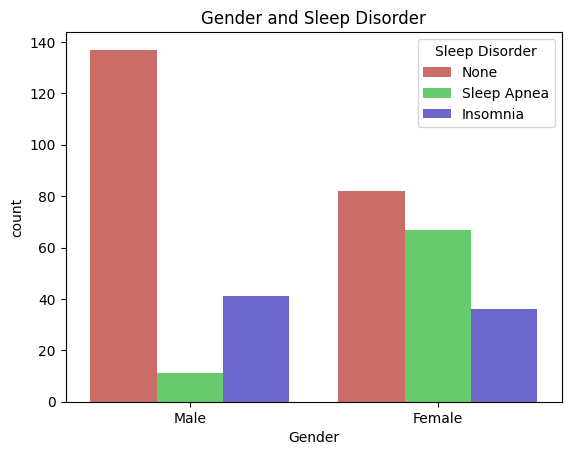

In [52]:
#Gender count plot
sns.countplot(x = 'Gender', data = data, palette = 'hls', hue = 'Sleep Disorder').set_title('Gender and Sleep Disorder')

#### Effects of Occupation on Sleep Disorder
The data presented in the graph clearly indicates that occupation plays a significant role in the prevalence of sleep disorders. Nurses are particularly susceptible to Sleep Apnea, with a substantial portion of them experiencing this disorder. There are very few nurses who do not have any sleep disorder. Following nurses, the next occupation most affected by sleep disorders is salespersons, with a higher incidence of Insomnia, closely followed by teachers.

However, there are certain occupations where the majority of individuals have a lower occurrence of both Sleep Apnea and Insomnia. These occupations include engineers, doctors, accountants, and lawyers. It is worth noting that the number of software engineers and managers in the dataset is relatively small, so it is difficult to draw definitive conclusions about their sleep disorder patterns. Interestingly, sales representatives, on the other hand, primarily exhibit Sleep Apnea without any instances of Insomnia or no sleep disorder at all.

<ipython-input-53-a179cbc8564c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Software Engineer'),
 Text(1, 0, 'Doctor'),
 Text(2, 0, 'Sales Representative'),
 Text(3, 0, 'Teacher'),
 Text(4, 0, 'Nurse'),
 Text(5, 0, 'Engineer'),
 Text(6, 0, 'Accountant'),
 Text(7, 0, 'Scientist'),
 Text(8, 0, 'Lawyer'),
 Text(9, 0, 'Salesperson'),
 Text(10, 0, 'Manager')]

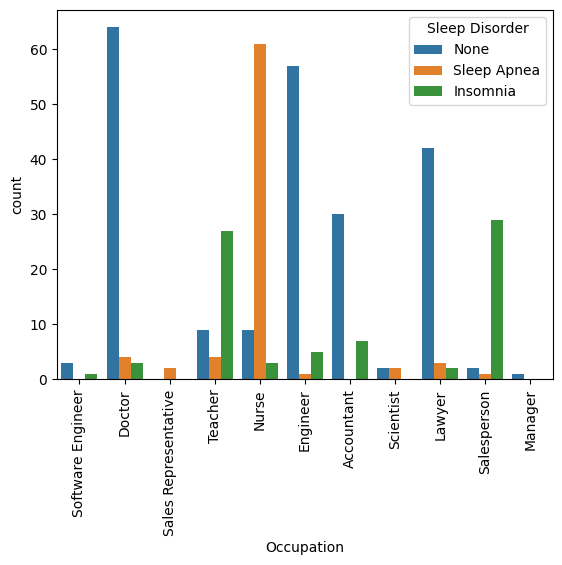

In [53]:
ax = sns.countplot(x = 'Occupation', data = data, hue = 'Sleep Disorder')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

#### BMI and Sleep Disorder
Individuals with a normal BMI have a lower likelihood of experiencing any sleep disorders. However, the situation is different for individuals who are classified as overweight or obese. Among these groups, overweight individuals are more prone to experiencing sleep disorders compared to those who are classified as obese.

Text(0.5, 1.0, 'BMI Category and Sleep Disorder')

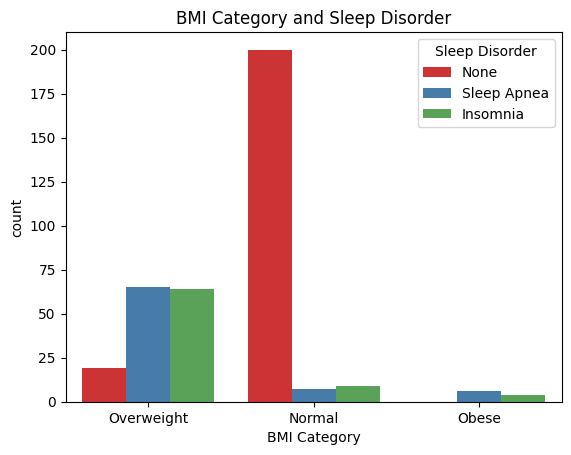

In [54]:
sns.countplot(x = 'BMI Category', hue = 'Sleep Disorder', data = data, palette = 'Set1').set_title('BMI Category and Sleep Disorder')

#### Label Encoding for categorical variables


In [69]:
label_encoder = preprocessing.LabelEncoder()

vars = ['Gender', 'Occupation','BMI Category','Sleep Disorder']
for i in vars:
    label_encoder.fit(data[i].unique())
    data[i] = label_encoder.transform(data[i])
    print(i,':' ,data[i].unique())

Gender : [1 0]
Occupation : [ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category : [2 0 1]
Sleep Disorder : [1 2 0]


### 4.2 Correlation <a name="Correlation"></a>

In [72]:
data.corr()

<ipython-input-72-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.339945,0.217105,-0.014509,-0.253415
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.523881,-0.225606,0.057973,0.232000
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.694390,0.043928,-0.105877,-0.169800
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.377637,-0.516455,-0.039533,0.177552
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.303876,-0.659865,0.016791,0.179592
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.075508,0.136971,0.772723,0.433214
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163665,0.670026,0.186829,-0.036058
BMI Category,-0.339945,0.523881,0.694390,-0.377637,-0.303876,0.075508,0.163665,1.000000,0.248550,0.015949,0.013629
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.248550,1.000000,-0.030309,0.205987
Daily Steps,-0.014509,0.057973,-0.105877,-0.039533,0.016791,0.772723,0.186829,0.015949,-0.030309,1.000000,0.342098


<ipython-input-71-414981424677>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

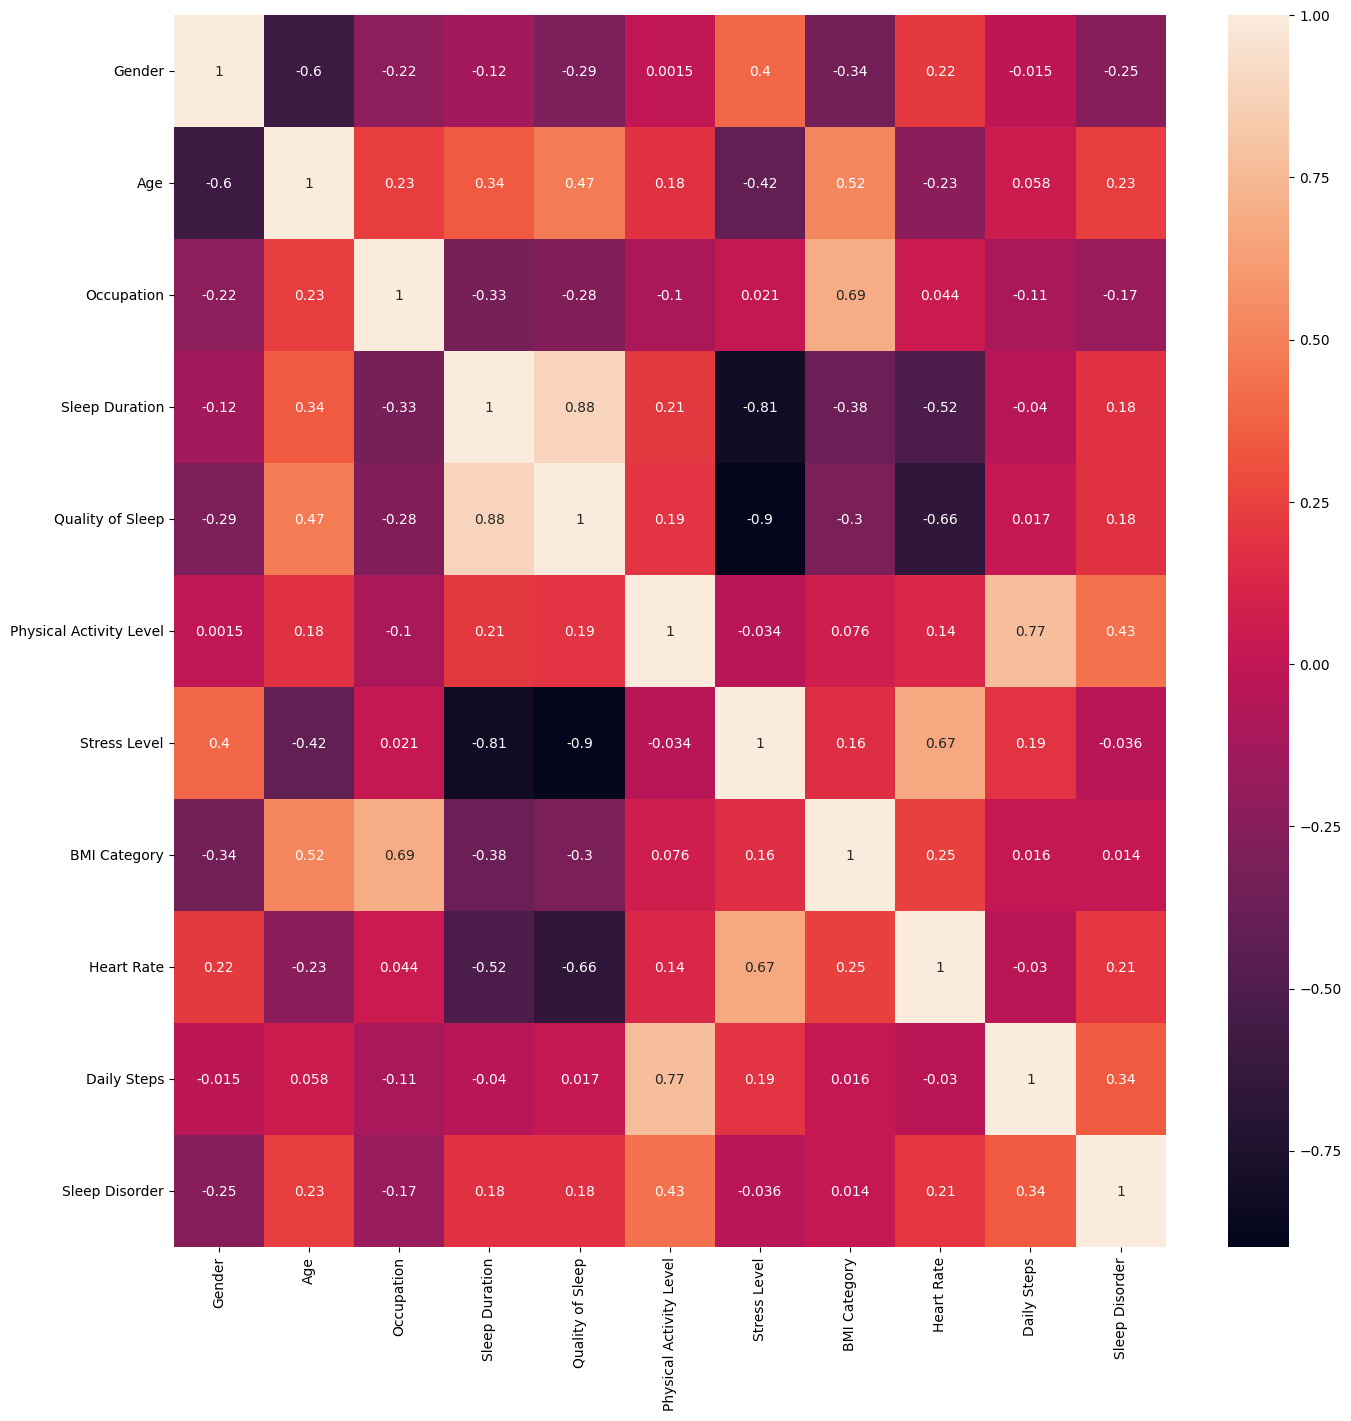

In [71]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), annot=True)

## 5. Model Building <a name="Model-Building"></a>
In thise section we build predictive models using machine learning algorithms.
First we have to split the dataset for training and testing.


In [73]:
x = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
print(X_train.shape,y_train.shape)

(261, 12) (261,)


### 5.1 Decision Tree <a name="Decision-Tree"></a>

In [74]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

#training accuracy
print("Training Accuracy:",dtree.score(X_train,y_train))

Training Accuracy: 0.9310344827586207


### 5.2 Random Forest <a name="Random-Forest"></a>

In [83]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(X_train, y_train)

#Training accuracy
print("Training accuracy: ",rfc.score(X_train,y_train))

Training accuracy:  0.9310344827586207


## 6. Evaluation <a name="Evaluation"></a>
In this secton we evaluate the performance of the models and compare them.

### 6.1 Confusion Matrix <a name="Confusion-Matrix"></a>

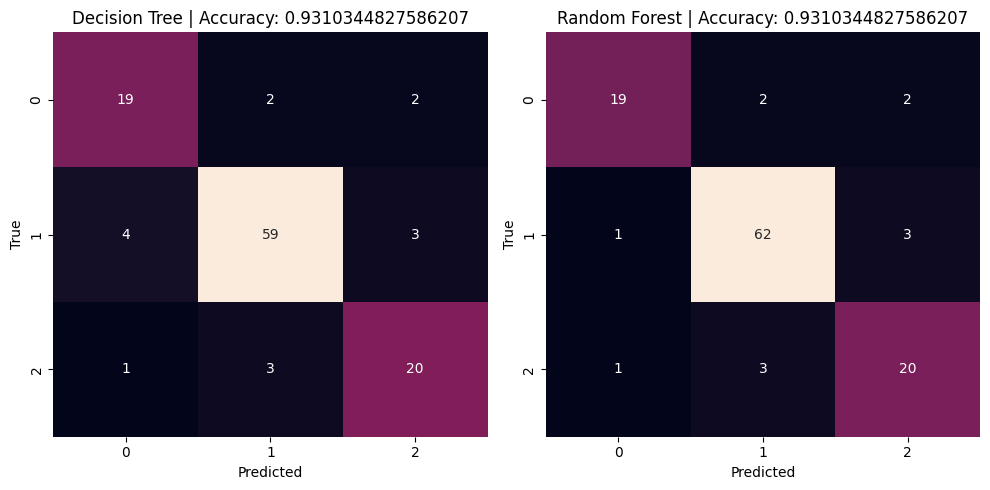

In [89]:
# List of model names
model_names = ['Decision Tree', 'Random Forest']

# List of predicted labels for each model
predicted_labels = [dtree.predict(X_test), rfc.predict(X_test)]

#List of model accuracy
accuracy = [dtree.score(X_train,y_train),rfc.score(X_train,y_train)]

# List of confusion matrices for each model
confusion_matrices = [confusion_matrix(y_test, predicted) for predicted in predicted_labels]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Iterate over each model and plot the confusion matrix
for i, ax in enumerate(axes.flatten()):
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cbar=False, ax=ax)
    ax.set_title("{0} | Accuracy: {1}".format(model_names[i],accuracy[i]))
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

The diagonal boxes in the matrix represent the number of true positive results, indicating the correct predictions made by the model. On the other hand, the off-diagonal boxes represent the number of false positive results, indicating the incorrect predictions made by the model.

#### Dsitribution plot for predicted and actual values

<ipython-input-104-d5683673509c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-104-d5683673509c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predicted_labels[0], hist=False, color="b", label="Fitte

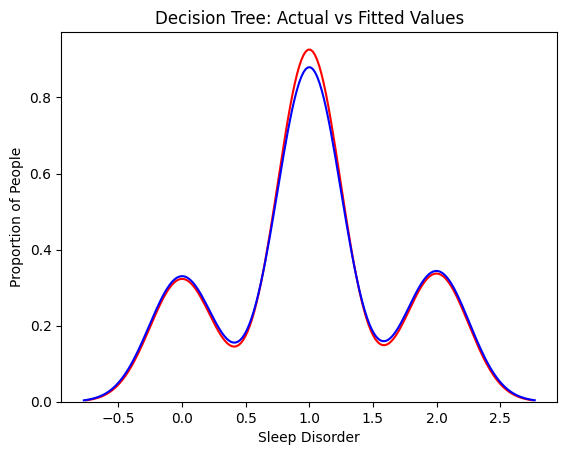

In [104]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted_labels[0], hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Decision Tree: Actual vs Fitted Values')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

In the graph, the actual values are denoted by red, while the predicted values are represented by blue. It can be observed that the model's predictions generally follow the curve of the actual values. However, there are noticeable differences between the predicted and actual values, indicating that the model is not able to accurately predict the values.

<ipython-input-105-c1073b5e62ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
<ipython-input-105-c1073b5e62ea>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predicted_labels[1], hist=False, color="b", label="Fitte

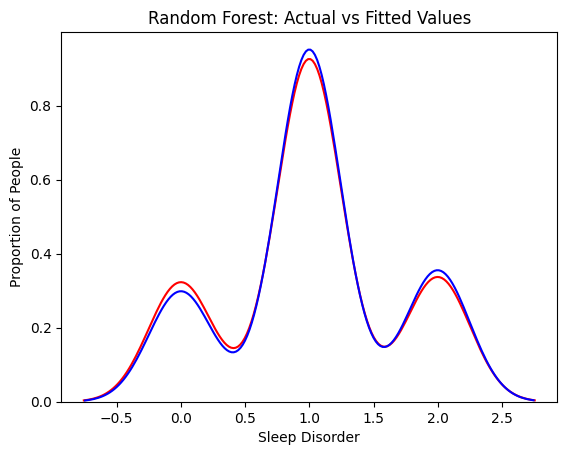

In [105]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted_labels[1], hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Random Forest: Actual vs Fitted Values')
plt.xlabel('Sleep Disorder')
plt.ylabel('Proportion of People')
plt.show()

The Random Forest classifier exhibits enhanced accuracy compared to the Decision Tree classifier, as evident from the wider gap between the actual and predicted values in the case of the Decision Tree classifier.

### 6.2 Other Metrics <a name="Other-Metrics"></a>

In [106]:
#Decision Tree
print(classification_report(y_test, predicted_labels[0]))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        23
           1       0.92      0.89      0.91        66
           2       0.80      0.83      0.82        24

    accuracy                           0.87       113
   macro avg       0.84      0.85      0.84       113
weighted avg       0.87      0.87      0.87       113



The model performs well, achieving a satisfactory accuracy of 87% and an average F1 score of 0.83. It demonstrates its ability to predict sleep disorders with a high level of accuracy.

In [107]:
#Random Forest
print(classification_report(y_test, predicted_labels[1]))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86        23
           1       0.93      0.94      0.93        66
           2       0.80      0.83      0.82        24

    accuracy                           0.89       113
   macro avg       0.88      0.87      0.87       113
weighted avg       0.89      0.89      0.89       113



The Random Forest Classifier model achieves an accuracy of 89% and an average F1 score of 0.86. These metrics indicate that the model is highly effective in predicting sleep disorders and outperforms the Decision Tree Classifier in terms of accuracy.

## 7. Conclusion <a name="Conclusion"></a>
Based on the exploratory data analysis, I have reached several conclusions regarding the factors influencing sleep disorders. Gender, occupation, and BMI are the three primary factors that contribute to sleep disorders. Males tend to have a higher incidence of Insomnia, while females are more prone to Sleep Apnea. Certain occupations, such as nursing, are associated with an increased risk of sleep disorders. BMI also plays a significant role, as individuals who are obese or overweight are more susceptible to sleep disorders.

In terms of classification models, both models demonstrated good performance. However, the Random Forest Classifier yielded excellent results, achieving an accuracy of 89%.

Based on the conclusions drawn from the analysis, there are several potential avenues for future work:

1. Investigating additional factors: While gender, occupation, and BMI were identified as significant factors, there may be other variables that contribute to sleep disorders. Exploring additional factors such as lifestyle choices, medical history, or environmental factors could provide a more comprehensive understanding of sleep disorders.

2. Deepening the analysis of occupation: Further research could delve deeper into the specific aspects of certain occupations that contribute to sleep disorders. Understanding the work conditions, stress levels, and sleep-related challenges within different professions can provide valuable insights for targeted interventions and preventive measures.

3. Longitudinal study: Conducting a longitudinal study to track individuals over an extended period can help establish causal relationships between factors and sleep disorders. This would provide a more robust understanding of how gender, occupation, and BMI impact sleep disorders over time.

4. Feature engineering: Exploring different feature engineering techniques, such as creating interaction terms or incorporating domain-specific knowledge, may enhance the predictive performance of the models. Feature selection algorithms can also be employed to identify the most relevant features for sleep disorder prediction.

5. Model optimization: Fine-tuning the models using hyperparameter optimization techniques could potentially improve their performance. Additionally, exploring different ensemble methods or other advanced machine learning algorithms may yield further improvements in accuracy and predictive power.

6. External validation: Validating the models on an external dataset from a different population or healthcare setting can help assess their generalizability and robustness. This step is crucial to ensure that the models perform well across different samples and can be applied in real-world scenarios.

By pursuing these future works, researchers can deepen their understanding of sleep disorders and develop more accurate predictive models, leading to improved diagnosis, treatment, and preventive strategies.